# **Praktikum 1 - ANNOY**
---

## **Percobaan 1**
---
Pada percobaan 1 kali ini, kita akan mencoba membandingkan hasil dari exact NN dengan ANNOY. data yang kita buat adalah data random 2D, dengan 1000 data point, mencari 3 data terdekat dari query point, Metric Similarity menggunakan Euclidean, dengan 3 tree Annoy.

Instalasi Annoy dulu untuk langkah awal

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=6e945d9c6619adbb217bc93161a8cd7c59dfc0a3dcbe670fc35552869061a534
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Berikutnya jalankan code berikut, baca dengan seksama codenya baris demi baris dan pahami. lakukan beberapa kali percobaan dan perhatikan juga hasilnya. catat hasilnya jika menggunakan jumlah tree yang berbeda.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 8.0807 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1421 ms


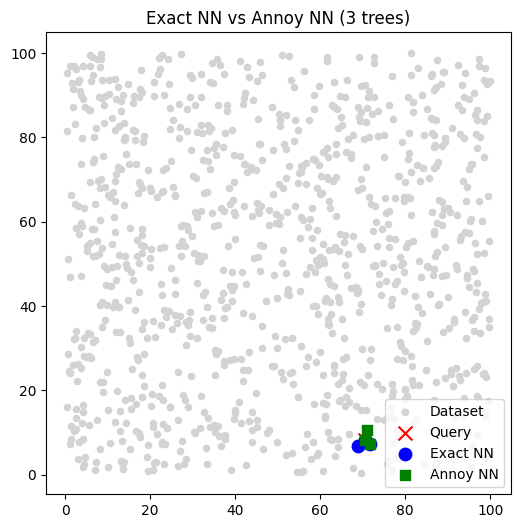

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 4.5762 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.1531 ms


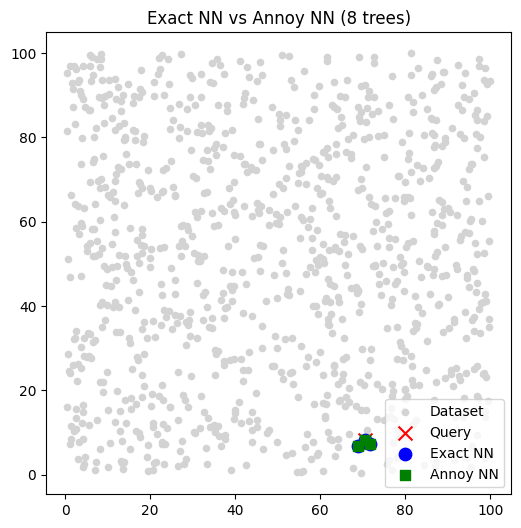

In [19]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (8 trees) 1000 data

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (8 trees)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # menggunakan 8 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i] - query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (8 trees)")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 7.6494 ms

Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.1369 ms


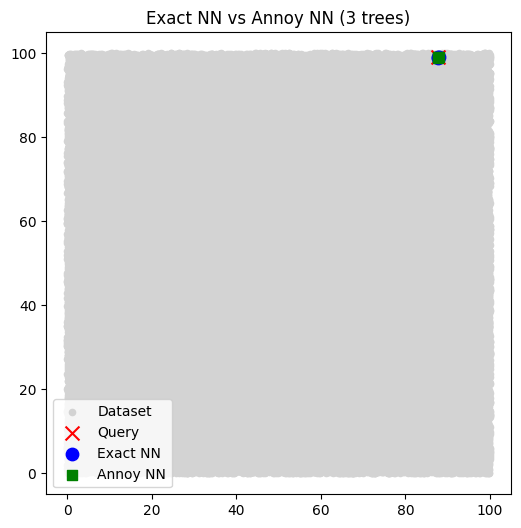

In [20]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (3 trees) 100000 data

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # menggunakan 3 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i] - query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 429 540]
Exact NN jarak (Angular): [0.00000000e+00 6.39189307e-07 1.06827100e-06]
Waktu Exact: 12.187 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak (Angular): [np.float64(0.0), np.float64(6.391893069279675e-07), np.float64(1.0682709955522895e-06)]
Waktu Annoy: 0.1316 ms


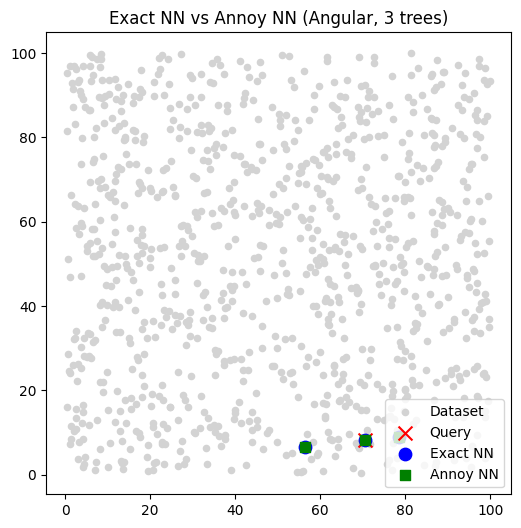

In [24]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (Angular, 3 trees, 1000 data)

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force, pakai sudut kosinus)
def angular_distance(a, b):
    # rumus: jarak sudut = 1 - cos(theta)
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees, Angular)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')  # gunakan metrik angular
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (Angular, 3 trees)")
plt.show()

Exact NN index: [219 429 540]
Exact NN jarak (Angular): [0.00000000e+00 6.39189307e-07 1.06827100e-06]
Waktu Exact: 26.9134 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak (Angular): [np.float64(0.0), np.float64(6.391893069279675e-07), np.float64(1.0682709955522895e-06)]
Waktu Annoy: 0.2306 ms


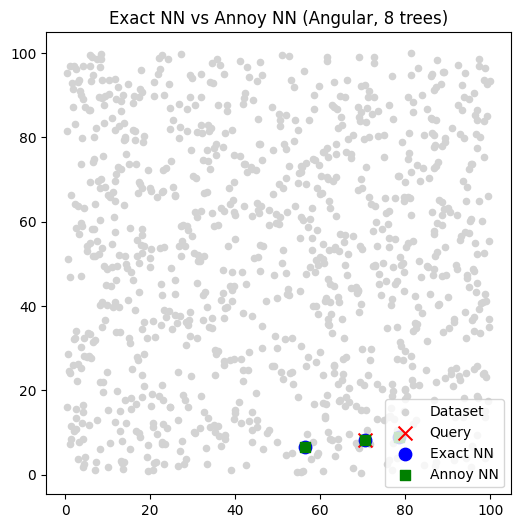

In [22]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (Angular, 8 trees, 1000 data)

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force, pakai sudut kosinus)
def angular_distance(a, b):
    # rumus: jarak sudut = 1 - cos(theta)
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees, Angular)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')  # gunakan metrik angular
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # 8 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (Angular, 8 trees)")
plt.show()

Exact NN index: [64040  1310  1267]
Exact NN jarak (Angular): [2.22044605e-16 6.23343599e-11 7.57095497e-11]
Waktu Exact: 1261.4977 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak (Angular): [np.float64(2.220446049250313e-16), np.float64(6.233435989599911e-11), np.float64(6.8060926894375484e-09)]
Waktu Annoy: 0.1221 ms


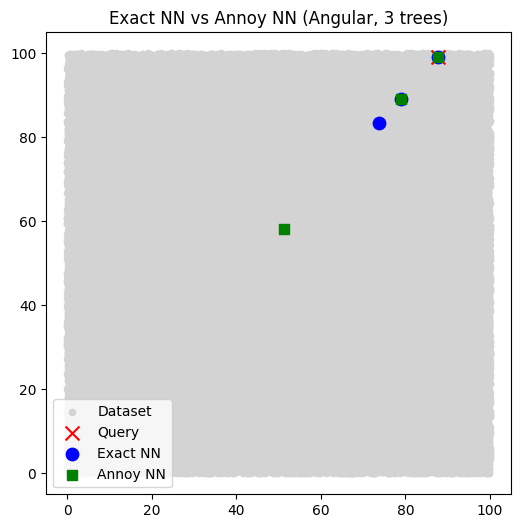

In [23]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (Angular, 3 trees, 100000 data)

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force, pakai sudut kosinus)
def angular_distance(a, b):
    # rumus: jarak sudut = 1 - cos(theta)
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (3 trees, Angular)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')  # gunakan metrik angular
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (Angular, 3 trees)")
plt.show()

Exact NN index: [64040  1310  1267]
Exact NN jarak (Angular): [2.22044605e-16 6.23343599e-11 7.57095497e-11]
Waktu Exact: 2073.2584 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak (Angular): [np.float64(2.220446049250313e-16), np.float64(6.233435989599911e-11), np.float64(6.8060926894375484e-09)]
Waktu Annoy: 0.1497 ms


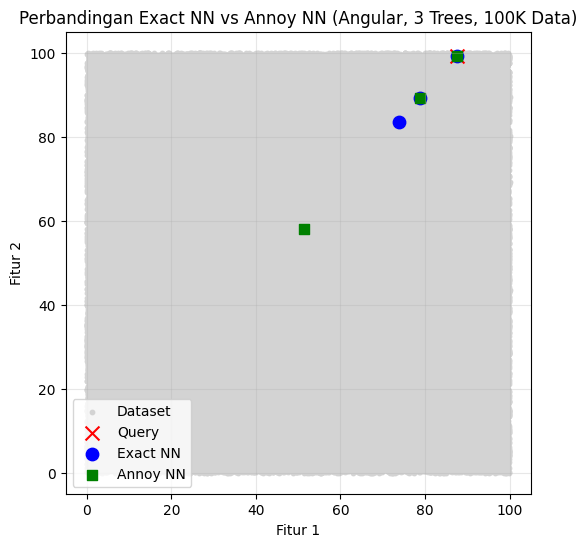

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D (100.000 titik)
np.random.seed(42)
n_points = 100_000
X = np.random.rand(n_points, 2) * 100  # titik acak dalam ruang 100x100

# Query point (ambil salah satu titik acak)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force) dengan jarak angular
def angular_distance(a, b):
    """Menghitung jarak angular: 1 - cos(theta)."""
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim

# Hitung semua jarak ke query
start = time.time()
distances = np.array([angular_distance(x, query) for x in X])
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak (Angular):", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Approximate NN dengan Annoy (3 trees, metrik angular)
f = 2  # dimensi
ann_index = AnnoyIndex(f, 'angular')

# Pengisian item ke index
for i, vec in enumerate(X):
    ann_index.add_item(i, vec)

# Bangun pohon (proses ini TIDAK dihitung dalam waktu pencarian)
ann_index.build(3)

# Query untuk mencari 3 tetangga terdekat
start = time.time()
idx_ann = ann_index.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak (Angular):", [angular_distance(X[i], query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=10, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Perbandingan Exact NN vs Annoy NN (Angular, 3 Trees, 100K Data)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(alpha=0.3)
plt.show()

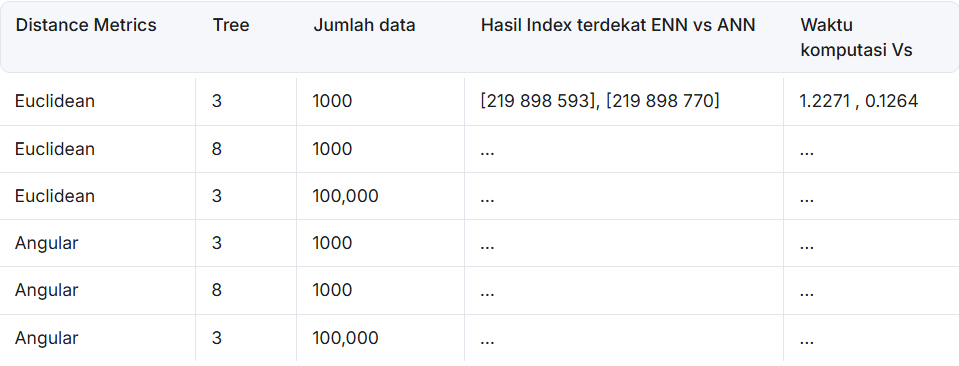

Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [24366515 16498439 37557288  6139048 15241853]
Exact NN time: 14.23 seconds


In [27]:
# Perbandingan Exact NN vs Annoy (euclidean, 8 trees, 1 juta data)

import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# Dataset simulasi 50 juta lagu dengan 20 fitur
n_tracks = 1000000
n_features = 20
X = np.random.rand(n_tracks, n_features).astype(np.float32)
query = np.random.rand(1, n_features).astype(np.float32)

# Pencarian Exact Nearest Neighbor (brute force)
start = time.time()
distances = euclidean_distances(query, X)[0]
exact_idx = np.argsort(distances)[:5]
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# Pencarian Approximate Nearest Neighbor dengan Annoy
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# Pembuatan index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

annoy_index.build(n_trees)

# Query pencarian lagu mirip menggunakan Annoy
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [ 55628 908566 946091 686921 585882]
Exact NN time: 0.159 seconds
Annoy result: [746509, 186005, 487435, 86013, 140756]
Annoy time: 0.0 seconds


In [28]:
# Perbandingan Exact NN vs Annoy (Angular, 8 trees, 1 juta data)

import numpy as np
import time
from annoy import AnnoyIndex

# Dataset simulasi 1 juta lagu dengan 20 fitur
n_tracks = 1_000_000
n_features = 20
X = np.random.rand(n_tracks, n_features).astype(np.float32)
query = np.random.rand(1, n_features).astype(np.float32)

# --- Exact Nearest Neighbor (brute force, Angular / Cosine) ---
def angular_distance(a, b):
    cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return 1 - cos_sim  # jarak angular = 1 - cos θ

start = time.time()
distances = np.array([angular_distance(x, query[0]) for x in X])
exact_idx = np.argsort(distances)[:5]
exact_time = time.time() - start

print("=== Exact NN (Angular) ===")
print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# --- Approximate Nearest Neighbor dengan Annoy (Angular) ---
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# Pembuatan index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

annoy_index.build(n_trees)

# Query pencarian lagu mirip menggunakan Annoy
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = time.time() - start

print("\n=== Annoy (Angular) ===")
print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

=== Exact NN (Angular) ===
Exact NN result: [ 73712 844208 427986 148345 901568]
Exact NN time: 7.795 seconds

=== Annoy (Angular) ===
Annoy result: [73712, 427986, 135012, 505468, 910249]
Annoy time: 0.0 seconds


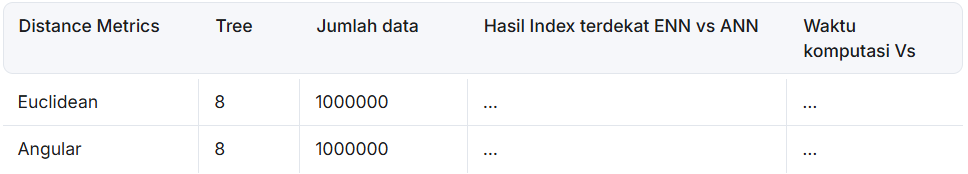

Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?

Jawab:

Bagian build index tidak dihitung waktunya karena bukan bagian dari proses pencarian (query phase), melainkan proses persiapan (indexing phase) yang hanya dilakukan sekali sebelum digunakan berulang-ulang untuk mencari tetangga terdekat.

# **Praktikum 2 - FAISS**
---
Pada percobaan kali ini kita akan membuat pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

In [2]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 14.4 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00013113021850585938
Waktu IVF+PQ: 0.00016307830810546875


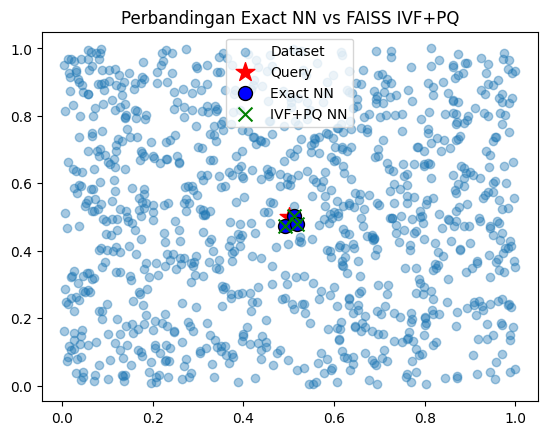

In [3]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()

Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

Exact NN (Flat) indices: [[286942 583487 695123]] distances: [[3.4966465e-07 1.0151125e-06 1.2744232e-06]]
IVF+PQ indices: [[286942 695123 581054]] distances: [[4.8242509e-07 2.0805746e-06 2.1811575e-06]]
Waktu Exact: 0.005513906478881836
Waktu IVF+PQ: 0.0008168220520019531


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


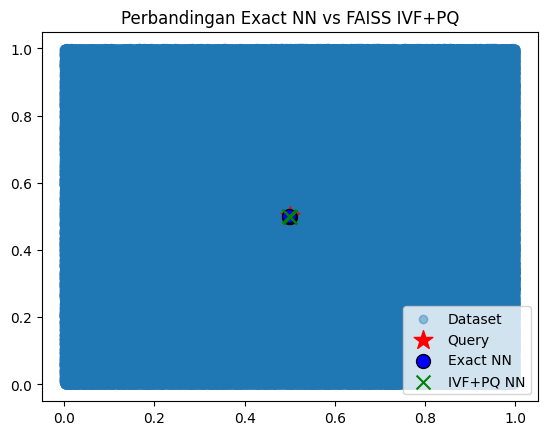

In [29]:
# 1000000 data 2D
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1_000_000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()

Exact NN (Flat) indices: [[988 780  27]] distances: [[0.01057143 0.0225298  0.04096785]]
IVF+PQ indices: [[988 780  27]] distances: [[0.01058318 0.0225963  0.04078479]]
Waktu Exact: 0.00013 detik
Waktu IVF+PQ: 0.000209 detik


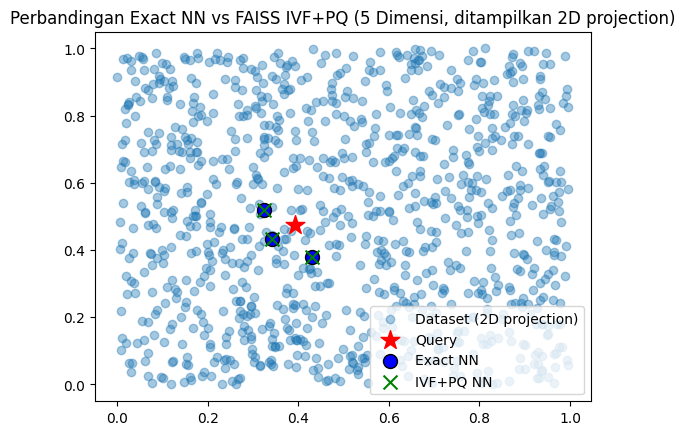

In [30]:
# 1000 data 5d
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 5D sederhana
np.random.seed(42)
X = np.random.rand(1000, 5).astype('float32')  # 1000 titik 5D
query = np.random.rand(1, 5).astype('float32')  # query acak di ruang 5D

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(5)   # gunakan 5, karena data 5 dimensi
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
time_flat = time.time() - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 5        # jumlah subvector (biasanya sama dengan jumlah dimensi)
quantizer = faiss.IndexFlatL2(5)   # gunakan 5 dimensi juga
index_ivfpq = faiss.IndexIVFPQ(quantizer, 5, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
time_ivfpq = time.time() - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", round(time_flat, 6), "detik")
print("Waktu IVF+PQ:", round(time_ivfpq, 6), "detik")

# 5. Visualisasi (hanya tampilkan 2D projection dari data 5D)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label="Dataset (2D projection)")
plt.scatter(query[:, 0], query[:, 1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0], 0], X[I_flat[0], 1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0], 0], X[I_ivfpq[0], 1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ (5 Dimensi, ditampilkan 2D projection)")
plt.show()

Exact NN (Flat) indices: [[901095 495168 561017]] distances: [[0.00151859 0.00221511 0.00223645]]
IVF+PQ indices: [[901095 561017 495168]] distances: [[0.0016292  0.00213303 0.00223935]]
Waktu Exact: 0.011317 detik
Waktu IVF+PQ: 0.00115 detik


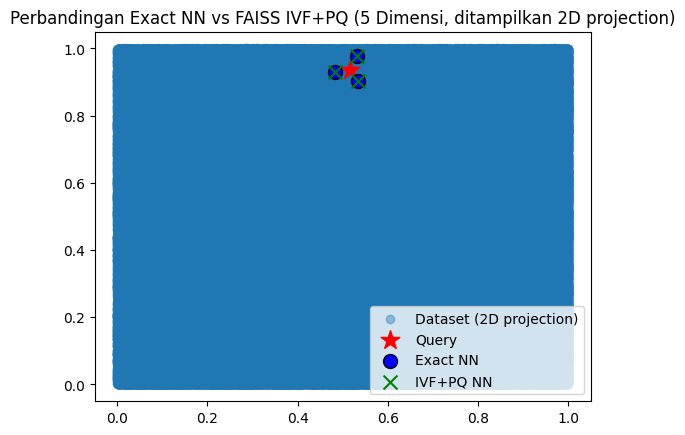

In [31]:
# 1jt data 5d
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 5D sederhana
np.random.seed(42)
X = np.random.rand(1_000_000, 5).astype('float32')  # 1000 titik 5D
query = np.random.rand(1, 5).astype('float32')  # query acak di ruang 5D

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(5)   # gunakan 5, karena data 5 dimensi
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
time_flat = time.time() - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 5        # jumlah subvector (biasanya sama dengan jumlah dimensi)
quantizer = faiss.IndexFlatL2(5)   # gunakan 5 dimensi juga
index_ivfpq = faiss.IndexIVFPQ(quantizer, 5, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
time_ivfpq = time.time() - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", round(time_flat, 6), "detik")
print("Waktu IVF+PQ:", round(time_ivfpq, 6), "detik")

# 5. Visualisasi (hanya tampilkan 2D projection dari data 5D)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label="Dataset (2D projection)")
plt.scatter(query[:, 0], query[:, 1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0], 0], X[I_flat[0], 1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0], 0], X[I_ivfpq[0], 1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ (5 Dimensi, ditampilkan 2D projection)")
plt.show()

# **Praktikum 3 - HNSW**
---
Install hnswlib terlebih dahulu.

In [4]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528146 sha256=c28248ada10a2b82b25f45af2ead5acfc3384822d983645f259c11ab7149484e
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


Percobaan berikut akan membandingkan exact NN dengan HNSW pada 1000 data 2D.

In [5]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.05852818489074707 detik

=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00014662742614746094 detik


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [32]:
# 1000 DATA 5D
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 5
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32) # Changed query to have 5 dimensions
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[ 59 422 611 336 636]]
Distances: [[0.18765113 0.23603942 0.2538904  0.27724761 0.29045191]]
Waktu: 0.014980077743530273 detik

=== HNSW ===
Indices: [[ 59 422 611 336 636]]
Distances: [[0.03521295 0.05571461 0.06446034 0.07686624 0.08436232]]
Waktu: 0.0003008842468261719 detik


In [33]:
# 1 JUTA DATA 2 DIMENSI
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1_000_000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[580290 725098 169378 126411 805403]]
Distances: [[0.00017793 0.00048013 0.00052635 0.00066746 0.00068415]]
Waktu: 0.045297861099243164 detik

=== HNSW ===
Indices: [[580290 725098 169378 126411 805403]]
Distances: [[3.1660676e-08 2.3052388e-07 2.7704647e-07 4.4549739e-07 4.6805692e-07]]
Waktu: 0.0002181529998779297 detik


In [34]:
# 1000000 DATA 5D
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1_000_000
dim = 5
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32) # Changed query to have 5 dimensions
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[336362 391466 882432 781072 211190]]
Distances: [[0.04826578 0.05440911 0.05795529 0.07041629 0.07177435]]
Waktu: 0.031099796295166016 detik

=== HNSW ===
Indices: [[336362 391466 882432 781072 211190]]
Distances: [[0.00232959 0.00296035 0.00335882 0.00495845 0.00515156]]
Waktu: 0.00025391578674316406 detik


# **Praktikum 4**
---
Percobaan kali ini kita akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [6]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 28.83827781677246 detik
Query time: 0.000232696533203125 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.015600204467773438 detik
Query time: 0.006107330322265625 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 172.12914109230042 detik
Query time: 0.00030875205993652344 detik
Neighbors: [129179 559276 630783 213191 559393] ...


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

# **Praktikum 5**
---
Untuk membandingkan ANN, biasanya menggunakan metrics Recall Query (berapa banyak nearest neighbors yang ditemukan dengan benar dan diplot dalam bentuk grafik untuk dapat memudahkan melihat perbedaannya. Salah satu repo yang sering digunakan adalah ANN Benchmark https://github.com/erikbern/ann-benchmarks

Grafik perbandingan Approximate Nearest Neighbor (ANN) digambarkan dengan sumbu X sebagai **recall** dan sumbu Y sebagai **queries per second (QPS)**. Recall menunjukkan seberapa banyak tetangga yang benar-benar sesuai dengan hasil pencarian *exact nearest neighbor*. Nilai recall mendekati 1 berarti hasil pencarian hampir sama persis dengan pencarian exact, sedangkan recall rendah berarti banyak tetangga yang ditemukan salah. Di sisi lain, QPS menunjukkan kecepatan algoritma dalam menjawab query, semakin tinggi nilainya berarti semakin cepat.

Interpretasi grafiknya adalah bahwa posisi **kanan atas** menunjukkan kondisi ideal, yaitu algoritma yang mampu memberikan hasil akurat (recall tinggi) sekaligus cepat (QPS tinggi). Posisi **kanan bawah** berarti akurat tapi lambat, sementara **kiri atas** berarti cepat tetapi kurang akurat. Dengan demikian, setiap algoritma ANN sebenarnya melakukan kompromi antara akurasi dan kecepatan. Semakin kita menginginkan hasil yang lebih akurat, biasanya kecepatan pencarian akan sedikit menurun, sehingga titik grafik cenderung bergeser ke kanan bawah.

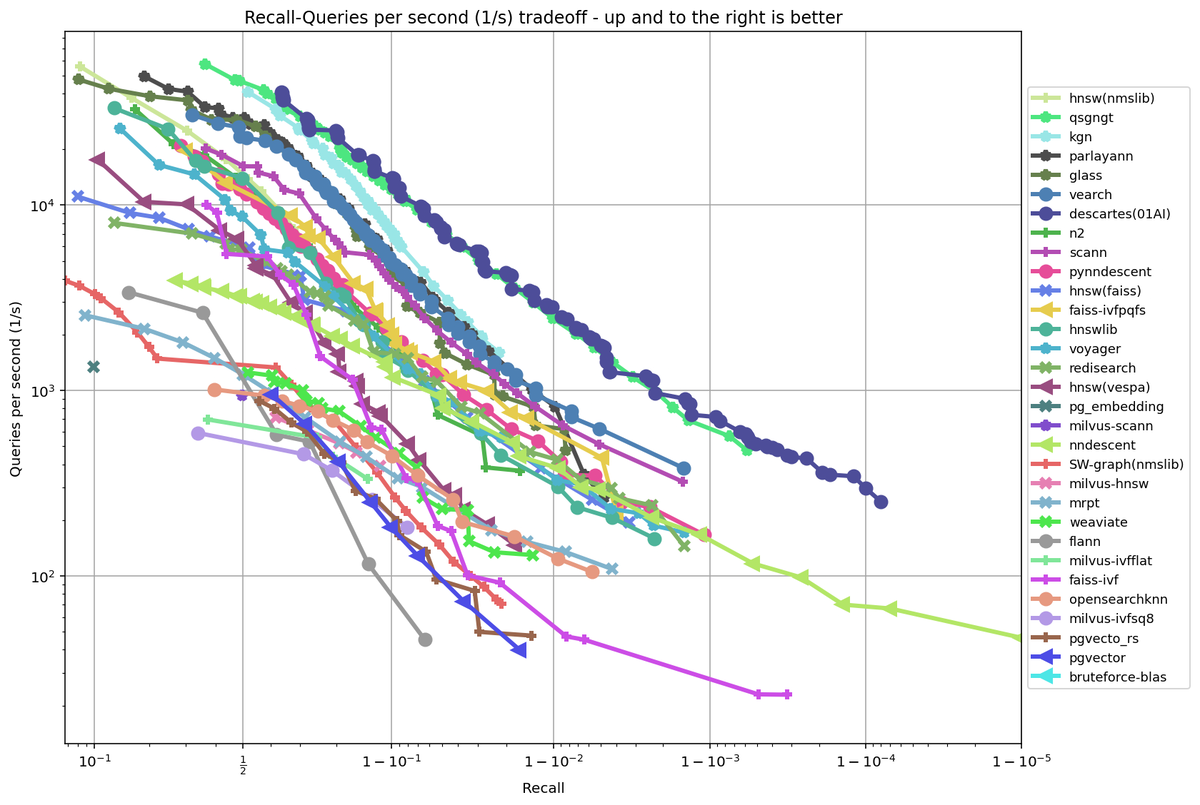

Penggunaan Repository ann benchmark memerlukan docker agar dapat dijalankan dengan baik. sayangnya Google Colab belum dilengkapi dengan docker, sehingga kita akan mencoba memvisualisasikan dengan grafik sederhana saja yang akan memberikan hasil yang mirip dengan ann benchmark.

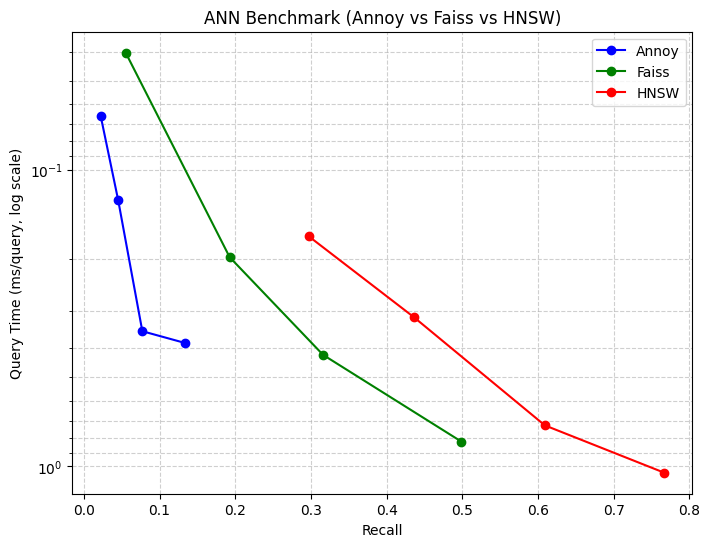

In [7]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# **Praktikum 6**
---
Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data . Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset). pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler. Lakukan pencarian track terdekat dan bandingkan hasilnya.

In [51]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
# Try different engine and error handling for potential parsing issues
try:
    df = pd.read_csv('/content/spotify_songs.csv', engine='python', on_bad_lines='skip')
except Exception as e:
    print(f"Error loading CSV: {e}")
    # Handle the error or exit if loading fails
    exit()

features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])  # L2 metric
nlist = 100
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Exact NN done in 17.339 s
Annoy done in 2.705 s
HNSW done in 12.188 s
FAISS IVF done in 2.581 s

Top-5 neighbors for first song:
Exact NN: [    0  3836 35205 41311 18028]
Annoy:    [0, 3836, 35205, 41311, 18028]
HNSW:     [    0  3836 35205 41311 18028]
FAISS:    [    0  3836 35205 41311 18028]


Buat dan tuliskan analisa anda terhadap code diatas.

# **Tugas**
---
Jalankan code berikut pada Google Colab dan PyDroid3 (Android Python) Application di Smartphone Android. Bandingkan hasilnya dan tuliskan analisa anda, tuliskan juga spesifikasi smartphone yang anda gunakan :).

In [55]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])  # L2 metric
nlist = 100
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")


# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 2.486 s
Annoy done in 0.764 s
HNSW done in 6.071 s
FAISS IVF done in 0.334 s

=== Ringkasan Waktu (detik) ===
Exact NN : 2.486
Annoy    : 0.764
HNSW     : 6.071
FAISS    : 0.334


# **Selamat belajar :)**